# BUDT 704 - Spring 2024 - Project
## Group 4: Isha_Tyagi    Gnapika_Komaragiri    Piyali_Bedagkar    Zidong_Liu

# Load data

In [ ]:
import pandas as pd

# Load the data from the Excel file
game_data = pd.read_excel('UMTerps Baseball 1999-2023.xlsx', sheet_name='Game')
year_data = pd.read_excel('UMTerps Baseball 1999-2023.xlsx', sheet_name='Year')

# Strip whitespace from column names
game_data.columns = game_data.columns.str.strip()
year_data.columns = year_data.columns.str.strip()

# Display the first few rows of the dataframe
game_data.head()
#year_data.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Date,Day,Time,At,Opponent,Location,Result,Terps,Oppnt
0,1999-01-29,Fri,15:00:00,Home,Oklahoma,"Orlando, FL",L,9,10
1,1999-01-30,Sat,19:00:00,Home,Jacksonville,"Orlando, FL",L,2,12
2,1999-02-13,Sat,12:00:00,Away,Elon,"Elon, NC",W,14,3
3,1999-02-13,Sat,15:00:00,Away,Elon,"Elon, NC",W,8,3
4,1999-02-14,Sun,13:00:00,Away,Elon,"Elon, NC",W,3,2


In [ ]:
# Print data frame info
game_data.info()

# Drop the 'Date' column, create a new DataFrame
game_data_clean = game_data.drop(columns=['Date'])

# Report all descriptive statistics
description = game_data_clean.describe()
description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1356 non-null   datetime64[ns]
 1   Day       1356 non-null   object        
 2   Time      1356 non-null   object        
 3   At        1356 non-null   object        
 4   Opponent  1356 non-null   object        
 5   Location  1356 non-null   object        
 6   Result    1356 non-null   object        
 7   Terps     1356 non-null   int64         
 8   Oppnt     1356 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 95.5+ KB


,Terps,Oppnt
count,1356.000000,1356.000000
mean,6.129794,6.008112
std,4.425118,4.473036
min,0.000000,0.000000
25%,3.000000,3.000000
50%,5.000000,5.000000
75%,8.000000,8.000000
max,28.000000,27.000000


#EDA

##Win/Loss Percentage by Day of the Week

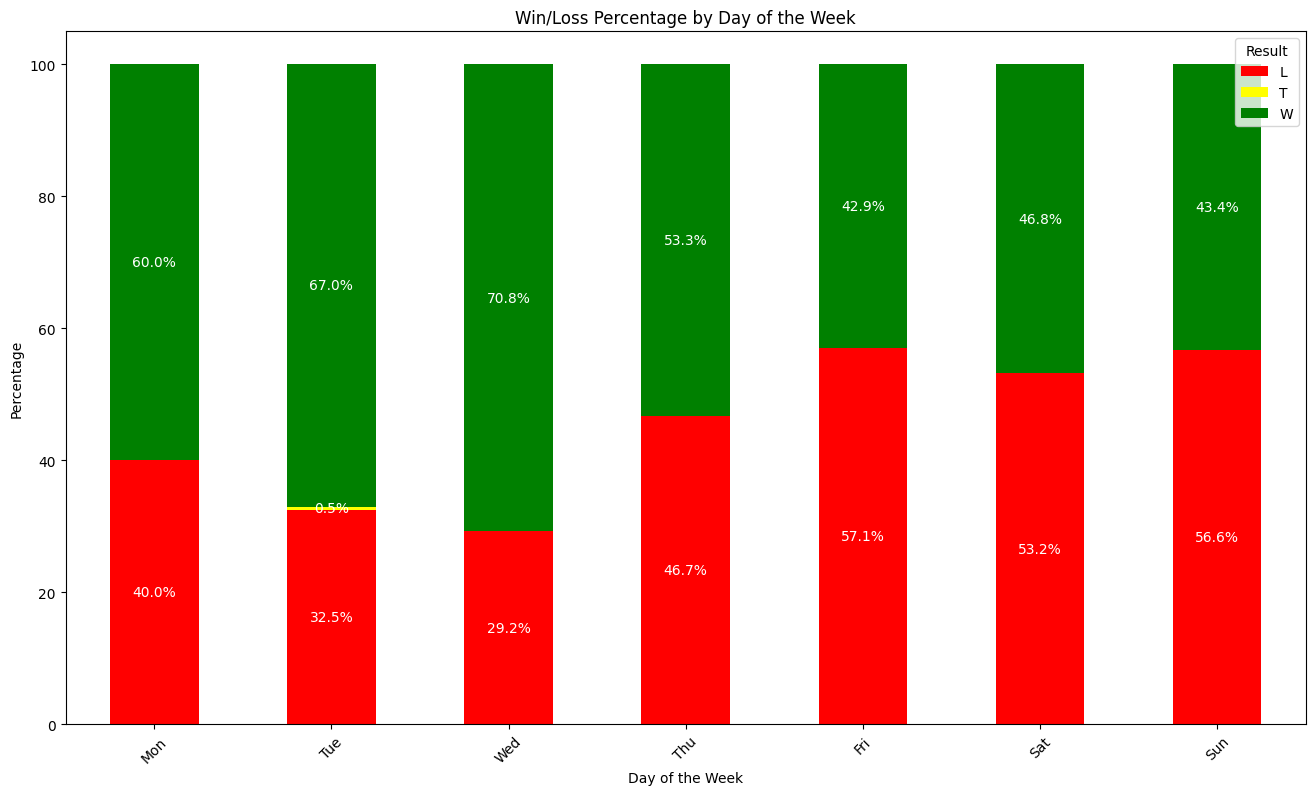

In [ ]:

# Define the correct order of weekdays
weekdays_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Group by 'Day' column and then count the 'Result' column for each group
results_by_day = game_data.groupby('Day')['Result'].value_counts().unstack(fill_value=0)

# Reorder the DataFrame to match the order of weekdays
results_by_day = results_by_day.reindex(weekdays_order)

# Calculate the percentage
results_by_day_pct = results_by_day.div(results_by_day.sum(axis=1), axis=0) * 100

# Plot the bar chart
ax = results_by_day_pct.plot(kind='bar', stacked=True, figsize=(16, 9), color=['red', 'yellow', 'green'])
plt.title('Win/Loss Percentage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Result')

# Add data labels on top of each bar with percentages
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=10)

plt.show()

##Game Results by Location (Home vs. Away)

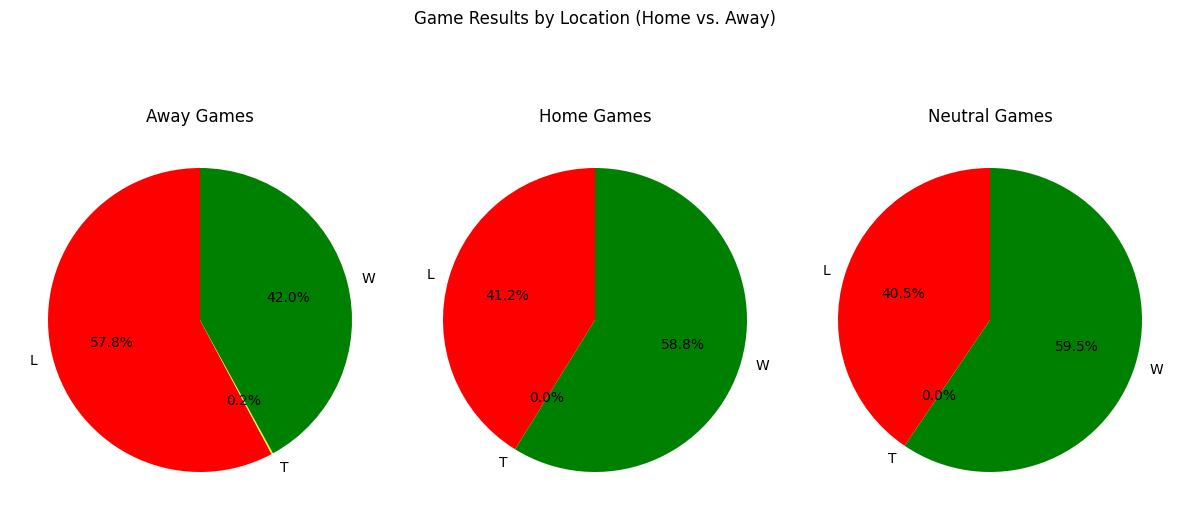

In [ ]:
# Group and count results by 'At' (Home/Away) and 'Result' (Win/Loss)
result_counts = game_data.groupby('At')['Result'].value_counts().unstack(fill_value=0)

# Define colors for each result type
colors = {'W': 'green', 'L': 'red', 'T': 'yellow'}

# Plot pie charts for each location type
fig, axes = plt.subplots(1, result_counts.shape[0], figsize=(12, 6))  # Adjust subplot layout based on the number of location types

for i, (index, row) in enumerate(result_counts.iterrows()):
    labels = row.index.tolist()
    sizes = row.values.tolist()
    pie_colors = [colors[label] for label in labels]  # Apply colors based on result types
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=pie_colors)
    axes[i].set_title(f'{index} Games')

plt.suptitle('Game Results by Location (Home vs. Away)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

#Stats Report

##Average Scores Trend (1999-2023)

         Terps     Oppnt
Year                    
1999  7.041667  7.583333
2000  6.617021  6.808511
2001  6.520000  8.780000
2002  8.603774  6.962264
2003  5.358491  7.528302
2004  5.857143  6.946429
2005  5.701754  6.368421
2006  5.017857  6.321429
2007  5.767857  5.946429
2008  6.500000  6.214286
2009  6.166667  6.462963
2010  4.517857  8.053571
2011  4.375000  5.946429
2012  4.928571  3.803571
2013  5.563636  4.618182
2014  5.333333  4.142857
2015  5.969697  4.196970
2016  5.000000  4.543860
2017  6.114754  4.721311
2018  5.018519  5.796296
2019  5.620690  6.327586
2020  7.400000  4.733333
2021  6.604167  5.312500
2022  9.225806  5.596774
2023  9.174603  6.841270


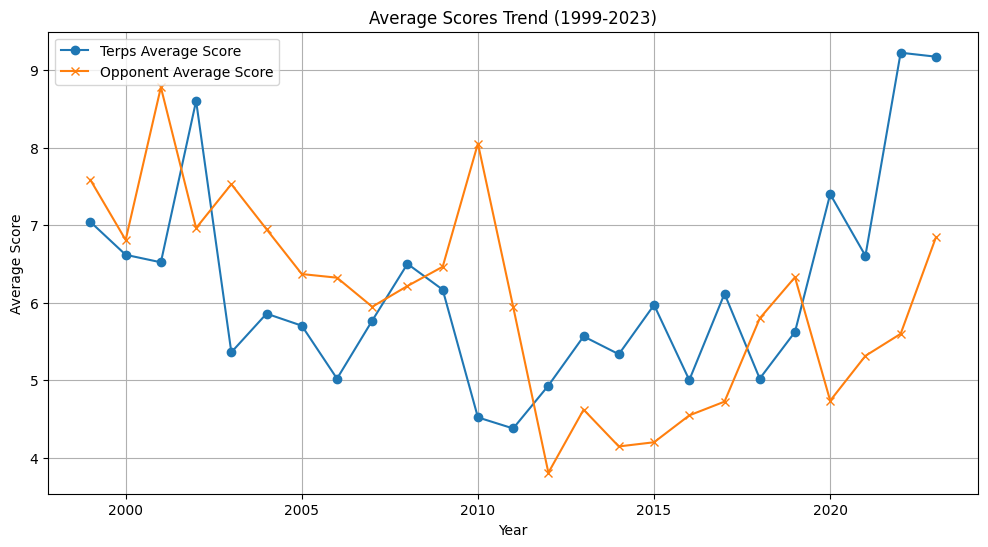

In [ ]:
# Ensure 'Date' is a datetime type
game_data['Date'] = pd.to_datetime(game_data['Date'])

# Extract year from 'Date'
game_data['Year'] = game_data['Date'].dt.year

# Compute average scores by year
average_scores = game_data.groupby('Year')[['Terps', 'Oppnt']].mean()
print(average_scores)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_scores.index, average_scores['Terps'], label='Terps Average Score', marker='o')
plt.plot(average_scores.index, average_scores['Oppnt'], label='Opponent Average Score', marker='x')
plt.title('Average Scores Trend (1999-2023)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()

##Win Rate Over Time

Result  Year  Win_Rate
0       1999     0.427
1       2000     0.426
2       2001     0.300
3       2002     0.604
4       2003     0.377
5       2004     0.393
6       2005     0.456
7       2006     0.464
8       2007     0.464
9       2008     0.536
10      2009     0.500
11      2010     0.304
12      2011     0.375
13      2012     0.571
14      2013     0.545
15      2014     0.635
16      2015     0.636
17      2016     0.526
18      2017     0.623
19      2018     0.444
20      2019     0.500
21      2020     0.667
22      2021     0.625
23      2022     0.774
24      2023     0.667


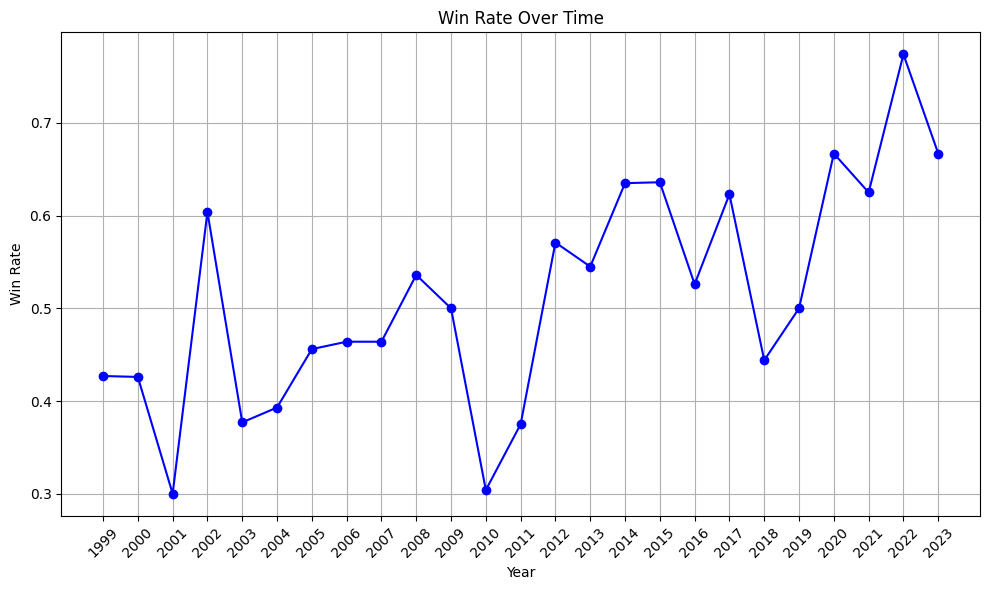

In [ ]:
# Group the data by 'Year' and 'Result' and count occurrences
yearly_results = game_data.groupby(['Year', 'Result']).size().unstack(fill_value=0)

# Calculate the total number of games for each year
yearly_results['Total'] = yearly_results.sum(axis=1)

# Calculate the adjusted wins (W + 0.5 * T)
yearly_results['Adjusted_Wins'] = yearly_results['W'] + 0.5 * yearly_results.get('T', 0)

# Calculate the win rate (Adjusted Wins / Total Games) and round to three decimal places
yearly_results['Win_Rate'] = (yearly_results['Adjusted_Wins'] / yearly_results['Total']).round(3)

# Reset index to ensure 'Year' is a column for plotting
yearly_results = yearly_results.reset_index()

# Display the DataFrame with the win rates
print(yearly_results[['Year', 'Win_Rate']])

# Plot the win rate over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_results['Year'], yearly_results['Win_Rate'], marker='o', linestyle='-', color='b')
plt.title('Win Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.grid(True)
plt.xticks(yearly_results['Year'], rotation=45)
plt.tight_layout()
plt.show()

##Win Rates Over Time by Location

In [ ]:
# Group the data by 'Year' and 'Result' and count occurrences
yearly_results = game_data.groupby(['Year', 'Result']).size().unstack(fill_value=0)

# Calculate the total number of games for each year
yearly_results['Total'] = yearly_results.sum(axis=1)

# Calculate the adjusted wins (W + 0.5 * T)
yearly_results['Adjusted_Wins'] = yearly_results['W'] + 0.5 * yearly_results.get('T', 0)

# Calculate the win rate (Adjusted Wins / Total Games) and round to three decimal places
yearly_results['Win_Rate'] = (yearly_results['Adjusted_Wins'] / yearly_results['Total']).round(3)

# Define a function to combine W, L, and T into a single column
def combine_results(row):
    """
    Combine wins, losses, and ties into a single string.

    Parameters:
    row (pd.Series): A row of the DataFrame containing columns 'W', 'L', and optionally 'T'.

    Returns:
    str: A string in the format 'W-L' if there are no ties, or 'W-L-T' if there are ties.
    """
    w = row['W']
    l = row['L']
    t = row.get('T', 0)
    if t == 0:
        return f"{int(w)}-{int(l)}"
    else:
        return f"{int(w)}-{int(l)}-{int(t)}"

yearly_results['WLT'] = yearly_results.apply(combine_results, axis=1)

# Drop unnecessary columns
yearly_results = yearly_results[['WLT', 'Win_Rate']]

# Reset index to prepare for merging
yearly_results = yearly_results.reset_index()

# Merge with the 'Year' sheet data based on the 'Year' column
merged_data = pd.merge(yearly_results, year_data[['Year', 'Overall', 'OverallP']], on='Year')

# Convert specified columns to string type and strip whitespace
merged_data['Overall'] = merged_data['Overall'].astype(str).str.strip()
merged_data['WLT'] = merged_data['WLT'].astype(str).str.strip()
merged_data['OverallP'] = merged_data['OverallP'].astype(str).str.strip()
merged_data['Win_Rate'] = merged_data['Win_Rate'].astype(str).str.strip()

# Reorder columns
merged_data = merged_data[['Year', 'Overall', 'WLT', 'OverallP', 'Win_Rate']]

# Create a 'Same' column to check if 'Overall' is equal to 'WLT' and 'OverallP' is equal to 'Win_Rate'
merged_data['Same'] = (merged_data['Overall'] == merged_data['WLT']) & (merged_data['OverallP'] == merged_data['Win_Rate'])

# Display the merged DataFrame
print(merged_data)

    Year  Overall      WLT OverallP Win_Rate  Same
0   1999  20-27-1  20-27-1    0.427    0.427  True
1   2000    20-27    20-27    0.426    0.426  True
2   2001    15-35    15-35      0.3      0.3  True
3   2002    32-21    32-21    0.604    0.604  True
4   2003    20-33    20-33    0.377    0.377  True
5   2004    22-34    22-34    0.393    0.393  True
6   2005    26-31    26-31    0.456    0.456  True
7   2006    26-30    26-30    0.464    0.464  True
8   2007    26-30    26-30    0.464    0.464  True
9   2008    30-26    30-26    0.536    0.536  True
10  2009    27-27    27-27      0.5      0.5  True
11  2010    17-39    17-39    0.304    0.304  True
12  2011    21-35    21-35    0.375    0.375  True
13  2012    32-24    32-24    0.571    0.571  True
14  2013    30-25    30-25    0.545    0.545  True
15  2014    40-23    40-23    0.635    0.635  True
16  2015    42-24    42-24    0.636    0.636  True
17  2016    30-27    30-27    0.526    0.526  True
18  2017    38-23    38-23    0

In [ ]:
# Ensure the 'Date' column is in datetime format
game_data['Date'] = pd.to_datetime(game_data['Date'])

# Extract the year from the 'Date' column
game_data['Year'] = game_data['Date'].dt.year

# Calculate results by location
location_results = game_data.groupby(['Year', 'At', 'Result']).size().unstack(fill_value=0)

# Combine W, L, and T into a single column for each location
def combine_results(row):
    """
    Combines win (W), loss (L), and tie (T) results into a single string.

    Args:
        row (pd.Series): A pandas Series object representing the results of a single location (home, away, or neutral) for a particular year.
                         The Series may contain columns 'W' (wins), 'L' (losses), and 'T' (ties).

    Returns:
        str: A string representing the combined results in the format 'W-L' or 'W-L-T'. If there are no ties, the format will be 'W-L'.
             If there are ties, the format will be 'W-L-T'.
    """
    w = row.get('W', 0)
    l = row.get('L', 0)
    t = row.get('T', 0)
    if t == 0:
        return f"{int(w)}-{int(l)}"
    else:
        return f"{int(w)}-{int(l)}-{int(t)}"

home_results = location_results.xs('Home', level='At').apply(combine_results, axis=1)
away_results = location_results.xs('Away', level='At').apply(combine_results, axis=1)
neutral_results = location_results.xs('Neutral', level='At').apply(combine_results, axis=1)

# Create a DataFrame from the combined results
combined_results = pd.DataFrame({
    'Year': home_results.index,
    'Home_WLT': home_results,
    'Away_WLT': away_results,
    'Neutral_WLT': neutral_results
}).reset_index(drop=True)

# Merge with the 'Year' sheet data based on the 'Year' column
merged_data = pd.merge(combined_results, year_data[['Year', 'Home', 'Away', 'Neutral']], on='Year')

# Reorder columns
merged_data = merged_data[['Year', 'Home', 'Home_WLT', 'Away', 'Away_WLT', 'Neutral', 'Neutral_WLT']]

# Display the merged DataFrame
print(merged_data)

    Year     Home Home_WLT      Away Away_WLT Neutral Neutral_WLT
0   1999   9-15-0     9-15   11-12-1  11-12-1   0-0-0         NaN
1   2000    11-13    11-13      9-14     9-14     0-0         NaN
2   2001     3-15     3-15     12-20    12-20     0-0         NaN
3   2002     23-5     23-5      9-16     9-16     0-0         NaN
4   2003    13-20    13-20      7-13     7-13     0-0         NaN
5   2004    15-14    15-14      7-20     7-20     0-0         NaN
6   2005    14-16    14-16     12-15    12-15     0-0         NaN
7   2006     16-9     16-9     10-21    10-21     0-0         NaN
8   2007    19-14    19-14      7-16     7-16     0-0         NaN
9   2008    21-12    21-12      9-14     9-14     0-0         NaN
10  2009     21-9     21-9      6-18     6-18     0-0         NaN
11  2010    11-21    11-21      6-18     6-18     0-0         NaN
12  2011    15-16    15-16      6-19     6-19     0-0         NaN
13  2012    21-10    21-10     11-14    11-14     0-0         NaN
14  2013  

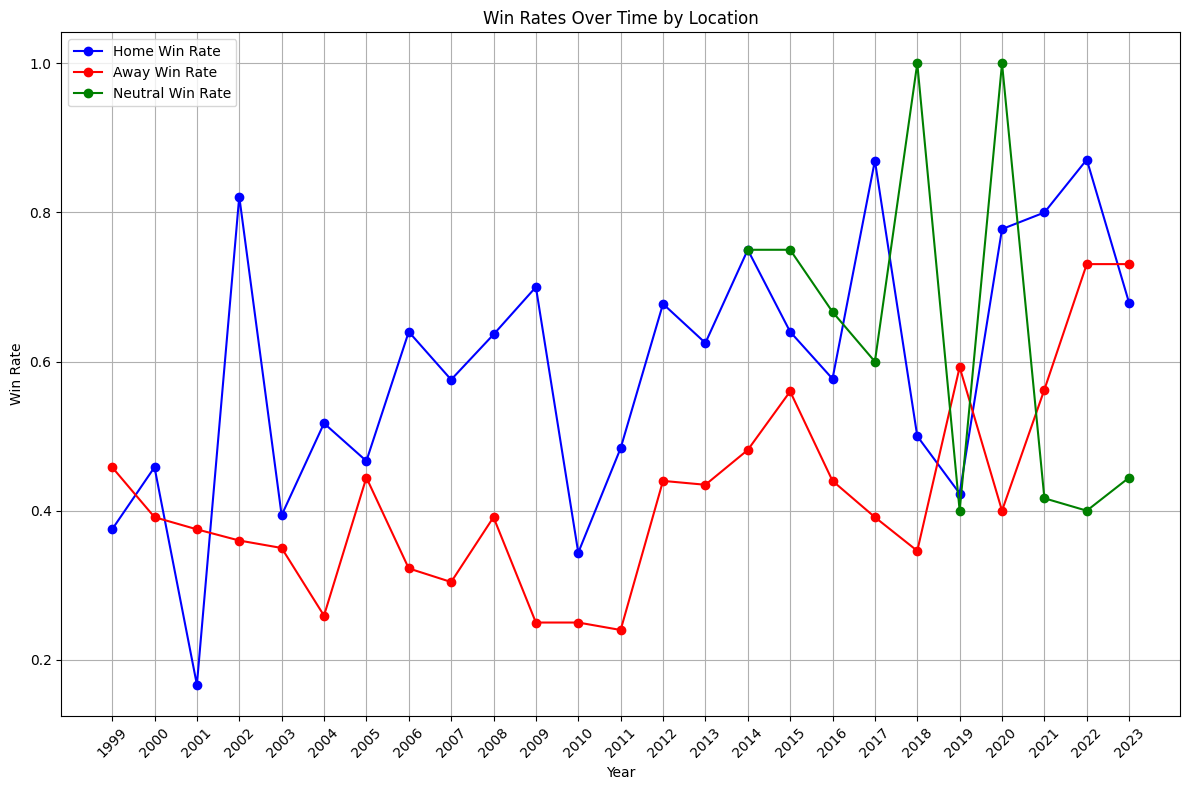

In [ ]:
# Group the data by 'Year', 'At' (location), and 'Result' and count occurrences
location_results = game_data.groupby(['Year', 'At', 'Result']).size().unstack(fill_value=0)

# Separate results for Home, Away, and Neutral
home_results = location_results.xs('Home', level='At').reset_index()
away_results = location_results.xs('Away', level='At').reset_index()
neutral_results = location_results.xs('Neutral', level='At').reset_index()

# Fill missing values with 0
home_results = home_results.fillna(0)
away_results = away_results.fillna(0)
neutral_results = neutral_results.fillna(0)

# Calculate win rates
home_results['Win_Rate'] = home_results['W'] / (home_results['W'] + home_results['L'] + home_results.get('T', 0))
away_results['Win_Rate'] = away_results['W'] / (away_results['W'] + away_results['L'] + away_results.get('T', 0))
neutral_results['Win_Rate'] = neutral_results['W'] / (neutral_results['W'] + neutral_results['L'] + neutral_results.get('T', 0))

# Plot the win rates over time for each location on the same plot
plt.figure(figsize=(12, 8))

plt.plot(home_results['Year'], home_results['Win_Rate'], marker='o', linestyle='-', color='b', label='Home Win Rate')
plt.plot(away_results['Year'], away_results['Win_Rate'], marker='o', linestyle='-', color='r', label='Away Win Rate')
plt.plot(neutral_results['Year'], neutral_results['Win_Rate'], marker='o', linestyle='-', color='g', label='Neutral Win Rate')

plt.title('Win Rates Over Time by Location')
plt.xlabel('Year')
plt.ylabel('Win Rate')
plt.legend()
plt.grid(True)
plt.xticks(ticks=home_results['Year'], rotation=45)  # Adjust x-ticks to be denser
plt.tight_layout()
plt.show()

#Model and Method

## LogisticRegression

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Model Coefficients: [[0.19031406 0.02293814 0.60343236]]
Model Intercept: [-1.18065173]
Accuracy: 0.5955882352941176
Precision: 0.589041095890411
Recall: 0.6323529411764706
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58       136
           1       0.59      0.63      0.61       136

    accuracy                           0.60       272
   macro avg       0.60      0.60      0.60       272
weighted avg       0.60      0.60      0.60       272



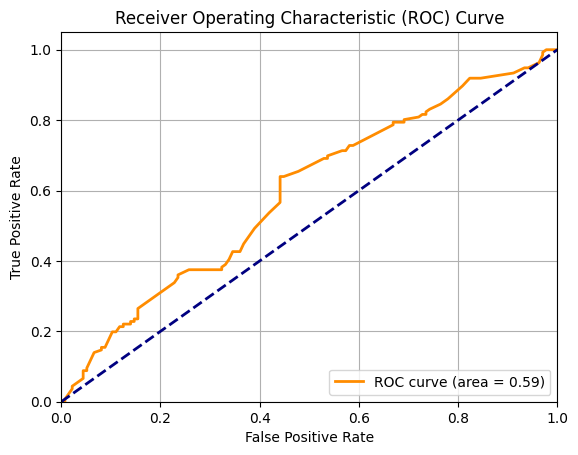

Predicted outcomes: [0 1 1 0 1]
Predicted probabilities of winning: [0.49837277 0.5229969  0.56449579 0.4950264  0.50410721]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
game_data = pd.read_excel('UMTerps Baseball 1999-2023.xlsx', sheet_name='Game')

# Data preprocessing
# Convert the 'Result' column to binary (1 for Win, 0 for Loss)
# This step is crucial for binary classification
game_data['Result'] = game_data['Result'].apply(lambda x: 1 if x == 'W' else 0)

# Encode categorical variables
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
label_encoder = LabelEncoder()
game_data['Day'] = label_encoder.fit_transform(game_data['Day'])
game_data['At'] = label_encoder.fit_transform(game_data['At'])

# Handle 'TBA' values in the 'Time' column
# Replace 'TBA' with the median hour of the day
# This step is necessary to handle missing or placeholder values in the 'Time' column
time_data = pd.to_datetime(game_data['Time'], errors='coerce', format='%H:%M:%S').dt.hour
median_hour = time_data.median()
game_data['Time'] = game_data['Time'].replace('TBA', median_hour).astype(str).str.extract(r'(\d+)').astype(int)
# Credits:
# The handling of 'TBA' values in the 'Time' column was inspired by examples and documentation from the following sources:
# 1. Pandas to_datetime documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# 2. Pandas Series median documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.median.html

# Define features and target variable, excluding 'Opponent'
# X contains the features: 'Day', 'Time', 'At'
# y contains the target variable: 'Result'
X = game_data[['Day', 'Time', 'At']]
y = game_data['Result']

# Split the data into training and testing sets
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)

# Evaluate the model
# Calculate accuracy, precision, recall, and classification report
# Reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Model summary
model_summary = {
    'Coefficients': log_reg.coef_,
    'Intercept': log_reg.intercept_,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': classification_rep
}

# Print model summary
print("Model Coefficients:", model_summary['Coefficients'])
print("Model Intercept:", model_summary['Intercept'])
print("Accuracy:", model_summary['Accuracy'])
print("Precision:", model_summary['Precision'])
print("Recall:", model_summary['Recall'])
print("Classification Report:\n", model_summary['Classification Report'])

# Compute ROC curve and ROC area
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Define new games data for prediction, excluding 'Opponent'
new_games = pd.DataFrame({
    'Day': [4, 5, 6, 1, 4], # Days for Fri, Sat, Sun, Tue, Fri
    'Time': [18, 14, 13, 16, 19], # Times converted to 24-hour format
    'At': [0, 0, 0, 1, 0] # Away = 0, Home = 1
})

# Predict the outcome of the new games
new_games_predictions_prob = log_reg.predict_proba(new_games)[:, 1]
new_games_predictions = log_reg.predict(new_games)

# Print the results
print("Predicted outcomes:", new_games_predictions)
print("Predicted probabilities of winning:", new_games_predictions_prob)


## RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Accuracy: 0.5441176470588235
Precision: 0.5483870967741935
Recall: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56       136
           1       0.55      0.50      0.52       136

    accuracy                           0.54       272
   macro avg       0.54      0.54      0.54       272
weighted avg       0.54      0.54      0.54       272



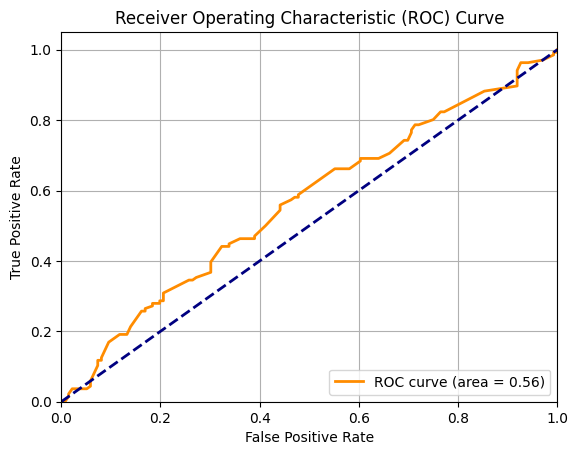

Predicted outcomes: [1 0 0 1 0]
Predicted probabilities of winning: [0.7005293  0.15148779 0.07       0.75141405 0.23242424]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
game_data = pd.read_excel('UMTerps Baseball 1999-2023.xlsx', sheet_name='Game')

# Data preprocessing
# Convert the 'Result' column to binary (1 for Win, 0 for Loss)
# This step is crucial for binary classification
game_data['Result'] = game_data['Result'].apply(lambda x: 1 if x == 'W' else 0)

# Encode categorical variables
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
label_encoder = LabelEncoder()
game_data['Day'] = label_encoder.fit_transform(game_data['Day'])
game_data['At'] = label_encoder.fit_transform(game_data['At'])

# Handle 'TBA' values in the 'Time' column
# Replace 'TBA' with the median hour of the day
# This step is necessary to handle missing or placeholder values in the 'Time' column
time_data = pd.to_datetime(game_data['Time'], errors='coerce', format='%H:%M:%S').dt.hour
median_hour = time_data.median()
game_data['Time'] = game_data['Time'].replace('TBA', median_hour).astype(str).str.extract(r'(\d+)').astype(int)

# Define features and target variable, excluding 'Opponent'
# X contains the features: 'Day', 'Time', 'At'
# y contains the target variable: 'Result'
X = game_data[['Day', 'Time', 'At']]
y = game_data['Result']

# Split the data into training and testing sets
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest model
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
# Calculate accuracy, precision, recall, and classification report
# Reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Model summary
model_summary = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': classification_rep
}

# Print model summary
print("Accuracy:", model_summary['Accuracy'])
print("Precision:", model_summary['Precision'])
print("Recall:", model_summary['Recall'])
print("Classification Report:\n", model_summary['Classification Report'])

# Compute ROC curve and ROC area
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Define new games data for prediction, excluding 'Opponent'
new_games = pd.DataFrame({
    'Day': [4, 5, 6, 1, 4], # Days for Fri, Sat, Sun, Tue, Fri
    'Time': [18, 14, 13, 16, 19], # Times converted to 24-hour format
    'At': [0, 0, 0, 1, 0] # Away = 0, Home = 1
})

# Predict the outcome of the new games
new_games_predictions_prob = rf_classifier.predict_proba(new_games)[:, 1]
new_games_predictions = rf_classifier.predict(new_games)

# Print the results
print("Predicted outcomes:", new_games_predictions)
print("Predicted probabilities of winning:", new_games_predictions_prob)
